# Linear Regression From Scratch
In this notebook you will implement linear regression using the least squares method.

The notebook will guide you in the general steps. You may use only numpy, pandas, and matplotlib for this exercise.

#### Math Background
The task is to solve linear regression for the data set of ```x``` and ```y```. That is, fit a line y to the data such that ```y = a + bx + e```. Where a and b are coefficents and e is an error term.

We know that ```b = SUM ( xi - x_mean) * (yi - y_mean) / SUM (xi - x_mean)^2``` where ```xi```, and ```yi``` are the indivdual observations and ```x_mean```, ```y_mean``` are means of all ```xi``` and ```yi```.

So a reasonable solution then for a fit is ```a = y_mean - b * x_mean```.


#### Implementation Steps
1. Load the file ```reg_data.csv```
2. Display the data with a scatter plot. Write a markdown cell and comment on the structure of the data and what kind of line you think will fit the data. 
3. Implement a function of the least squares method.
4. Plot the predictions from your function.
5. Comment on the output of your function. Does it make sense? Can it be made better? If yes, how?

In [14]:
#import the minimum packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [15]:
#load and inspect the data
df = pd.read_csv('reg_data.csv')
df

,X,Y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


In [16]:
assert df.shape == (100,2)

Text(0, 0.5, 'Y')

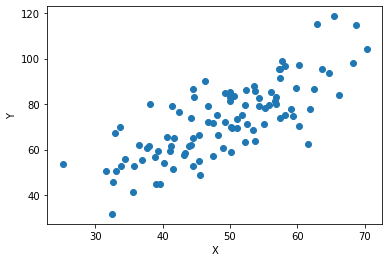

In [17]:
#plot the data (scatter)
plt.scatter(df['X'],df['Y'])
plt.xlabel("X")
plt.ylabel("Y")

It seems this variables are strongly related in a linear form, so a linear regression would fit properly.

In [18]:
X=df['X'].to_numpy()
Y=df['Y'].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [19]:
assert x_train.shape == (80,)
assert x_test.shape == (20,)
assert y_train.shape == (80,)
assert y_test.shape == (20,)

In [20]:
#implement a least squares function to find a, b
def least_squares():
    x_mean = X.mean()
    y_mean = Y.mean()
    b = np.sum( (x_train - x_mean) * (y_train - y_mean)) / np.sum((x_train - x_mean)**2)
    a = y_mean - b * x_mean
    print(b)
    print(a)
    return a,b

In [70]:
assert abs(a - 7.72) <=0.03
assert abs(b - 1.32) <=0.03

AssertionError: 

1.346196283420416
6.827513235707599


Text(0, 0.5, 'Predictions')

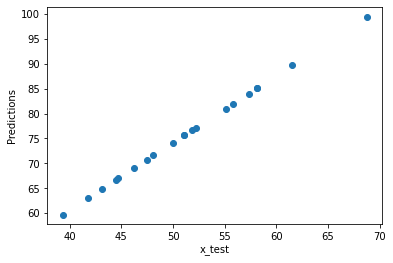

In [22]:
x = x_test
a,b = least_squares()
predictions = a+b*x
plt.scatter(x_test,predictions)
plt.xlabel("x_test")
plt.ylabel("Predictions")

In [53]:
assert abs(a +3*b - 11.69) <= 0.05
assert abs(a +100*b - 140) <= 1

AssertionError: 

In [84]:
#Classify your test data in to classes
#if the Y value for a certain X is lower than the line then the class is 0
class_0 = x_test[y_test<predictions]
class_1 = x_test[y_test>=predictions]

class_0 = np.array(class_0)
class_1 = np.array(class_1)
print(class_0.shape)
print(class_1.shape)

(15,)
(5,)


In [85]:
assert 9 < class_0.shape[0] < 13
assert 7 < class_1.shape[0] < 11

AssertionError: 

It's the best line that can fit this data but as the data is wide in each X it makes lot of error.